In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import sklearn as sk 
import psycopg2 as psy
import sqlalchemy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import seaborn as sns
from __future__ import print_function
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.tools import FigureFactory as FF
tls.set_credentials_file(username='lasisioo', api_key='qwwplqpgcq')

In [2]:
df = pd.read_csv("../assets/airportdata.csv")
df = df.drop(["Unnamed: 0"], axis=1)
#df.columns

In [3]:
toint = ["year", "departure cancellations", "arrival cancellations", "departure diversions", "arrival diversions"]
df[toint] = df[toint].astype(int)
df.head()

,airport,year,departure cancellations,arrival cancellations,departure diversions,arrival diversions,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,0,2004,242,235,71,46,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,0,2005,221,190,61,33,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,0,2006,392,329,71,124,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,0,2007,366,304,107,45,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,0,2008,333,300,79,42,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [4]:
df.dtypes

airport                                 int64
year                                    int64
departure cancellations                 int64
arrival cancellations                   int64
departure diversions                    int64
arrival diversions                      int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
dtype: object

| Variable | Description | Data Type | Variable Type
| --- | --- | --- | --- |
| airport | The unique number to represent an airport | Integer | Unique |
| year | The year related to the airport| Integer | Continuous |
| departure cancellations | The number of departure cancellations in an airport in a given year | Integer | Continuous |
| arrival cancellations | The number of arrival cancellations in an airport in a given year | Integer | Continuous |
| departure diversions | The number of departures that were diverted in an airport in a given year | Integer | Continuous |
| arrival diversions | The number of arrivals that were diverted in an airport in a given year | Integer | Continuous |
| percent on-time gate departures | The percentage of on-time gate departures in an airport in a given year | Float | Continuous |
| percent on-time airport departures | The percentage of on-time airport departures in an airport in a given year | Float | Continuous |
| percent on-time gate arrivals | The percentage of on-time gate arrivals in an airport in a given year | Float | Continuous |
| average_gate_departure_delay | The average daily number of gate departure delays in an airport in a given year, in minutes | Float | Continuous |
| average_taxi_out_time	| The average taxi-out time in an airport in a given year, in minutes | Float | Continuous |
| average taxi out delay | The average taxi-out delay in an airport in a given year, in minutes | Float | Continuous |
| average airport departure delay | The average airpoty delay on arrival in an airport in a given year, in minutes | Float | Continuous |
| average airborne delay | The difference between actual and scheduled airborne time, in minutes | Float | Continuous |
| average taxi in delay	| The average taxi-out delay in an airport in a given year, in minutes | Float | Continuous |
| average block delay | The difference between actual and scheduled gate-to-gate time, in minutes | Float | Continuous |
| average gate arrival delay | The average gate delay on arrival in an airport in a given year, in minutes | Float | Continuous |


In [5]:
df.shape

(805, 17)

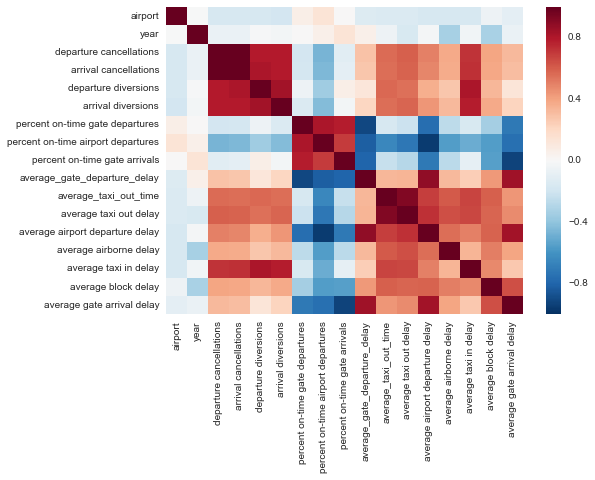

In [6]:
sns.heatmap(df.corr())

In [7]:
df["airport"] = df["airport"].astype("category")
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [8]:
normalized = ["airport", "year", "departure cancellations", "arrival cancellations", 
              "departure diversions", "arrival diversions", "percent on-time gate departures", 
              "percent on-time airport departures", "percent on-time gate arrivals", 
              "average_gate_departure_delay", "average_taxi_out_time", "average taxi out delay", 
              "average airport departure delay", "average airborne delay", "average taxi in delay", 
              "average block delay", "average gate arrival delay"]
df[normalized] = df[normalized].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

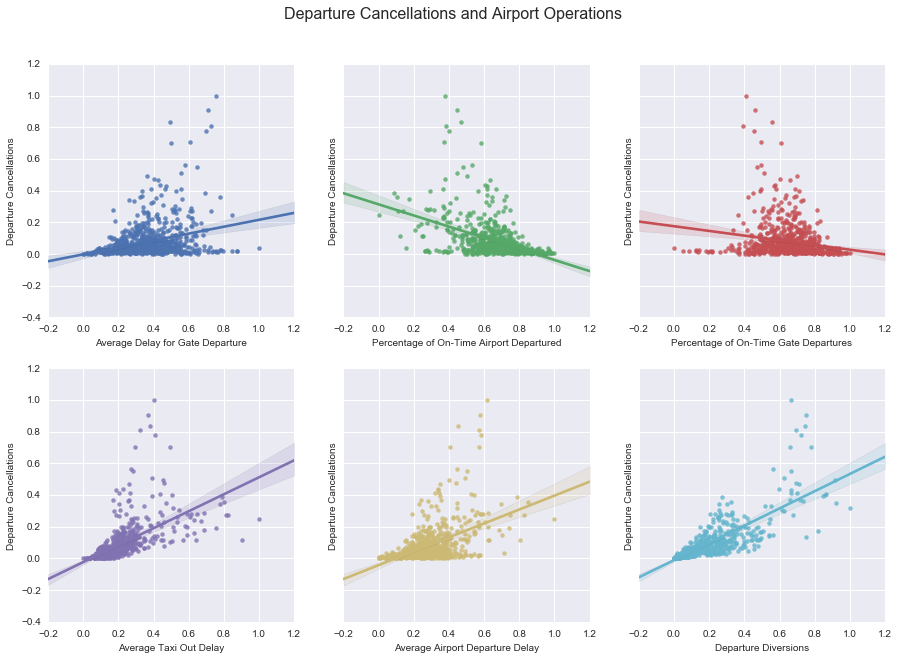

In [9]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(15, 10))
plt.suptitle("Departure Cancellations and Airport Operations", size=16)

sns.set_style('whitegrid')
fig1 = sns.regplot(x="average_gate_departure_delay", y="departure cancellations", data=df, ax=ax1)
ax1.set_xlabel("Average Delay for Gate Departure",fontsize=10)
ax1.set_ylabel("Departure Cancellations",fontsize=10)

fig2 = sns.regplot(x="percent on-time airport departures", y="departure cancellations", data=df, ax=ax2)
ax2.set_xlabel("Percentage of On-Time Airport Departured",fontsize=10)
ax2.set_ylabel("Departure Cancellations",fontsize=10)

fig3 = sns.regplot(x="percent on-time gate departures", y="departure cancellations", data=df, ax=ax3)
ax3.set_xlabel("Percentage of On-Time Gate Departures",fontsize=10)
ax3.set_ylabel("Departure Cancellations",fontsize=10)

fig4 = sns.regplot(x="average taxi out delay", y="departure cancellations", data=df, ax=ax4)
ax4.set_xlabel("Average Taxi Out Delay",fontsize=10)
ax4.set_ylabel("Departure Cancellations",fontsize=10)

fig5 = sns.regplot(x="average airport departure delay", y="departure cancellations", data=df, ax=ax5)
ax5.set_xlabel("Average Airport Departure Delay",fontsize=10)
ax5.set_ylabel("Departure Cancellations",fontsize=10)

fig6 = sns.regplot(x="departure diversions", y="departure cancellations", data=df, ax=ax6)
ax6.set_xlabel("Departure Diversions",fontsize=10)
ax6.set_ylabel("Departure Cancellations",fontsize=10)

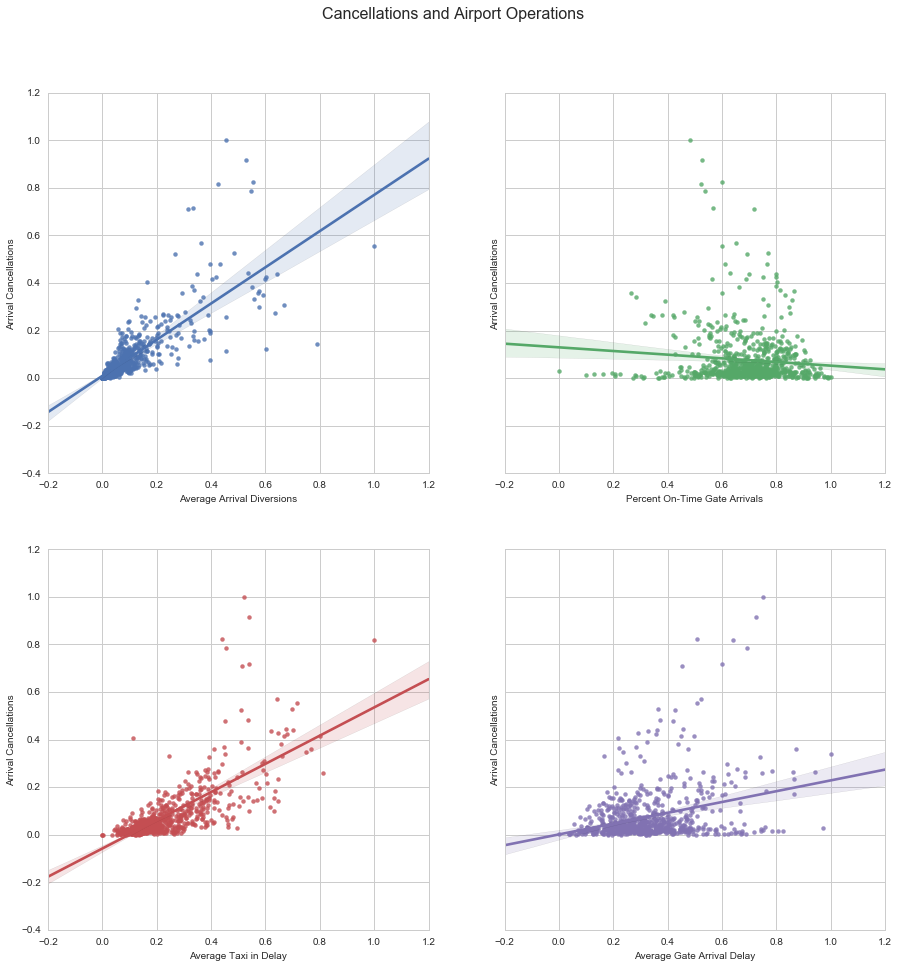

In [10]:
fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(15, 15))
plt.suptitle("Cancellations and Airport Operations", size=16)

sns.set_style('whitegrid')
fig1 = sns.regplot(x="arrival diversions", y="arrival cancellations", data=df, ax=ax1)
ax1.set_xlabel("Average Arrival Diversions",fontsize=10)
ax1.set_ylabel("Arrival Cancellations",fontsize=10)

fig2 = sns.regplot(x="percent on-time gate arrivals", y="arrival cancellations", data=df, ax=ax2)
ax2.set_xlabel("Percent On-Time Gate Arrivals",fontsize=10)
ax2.set_ylabel("Arrival Cancellations",fontsize=10)

fig3 = sns.regplot(x="average taxi in delay", y="arrival cancellations", data=df, ax=ax3)
ax3.set_xlabel("Average Taxi in Delay",fontsize=10)
ax3.set_ylabel("Arrival Cancellations",fontsize=10)

fig4 = sns.regplot(x="average gate arrival delay", y="arrival cancellations", data=df, ax=ax4)
ax4.set_xlabel("Average Gate Arrival Delay",fontsize=10)
ax4.set_ylabel("Arrival Cancellations",fontsize=10)

In [11]:
df.dropna(axis=0, inplace=True)

In [12]:
df.count()

airport                               799
year                                  799
departure cancellations               799
arrival cancellations                 799
departure diversions                  799
arrival diversions                    799
percent on-time gate departures       799
percent on-time airport departures    799
percent on-time gate arrivals         799
average_gate_departure_delay          799
average_taxi_out_time                 799
average taxi out delay                799
average airport departure delay       799
average airborne delay                799
average taxi in delay                 799
average block delay                   799
average gate arrival delay            799
dtype: int64

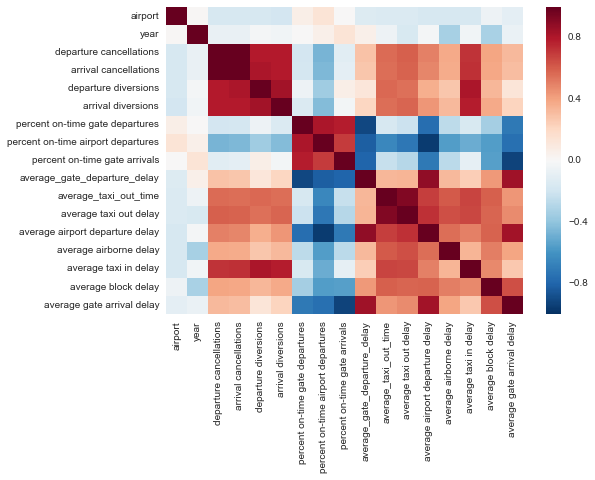

In [13]:
sns.heatmap(df.corr())

In [14]:
X = df[["percent on-time airport departures", 
        "percent on-time gate arrivals", "average_gate_departure_delay", 
        "average_taxi_out_time", "average taxi out delay", 
        "average airport departure delay", "average airborne delay", 
        "average taxi in delay", "average block delay", 
        "average gate arrival delay"
       ]]

For n_clusters = 2 The average silhouette_score is : 0.409466528634


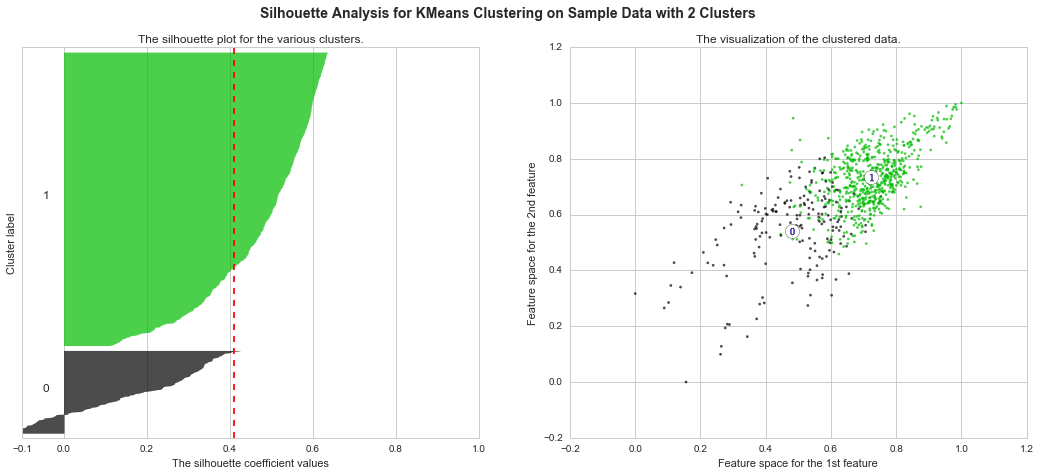

For n_clusters = 3 The average silhouette_score is : 0.243833756646


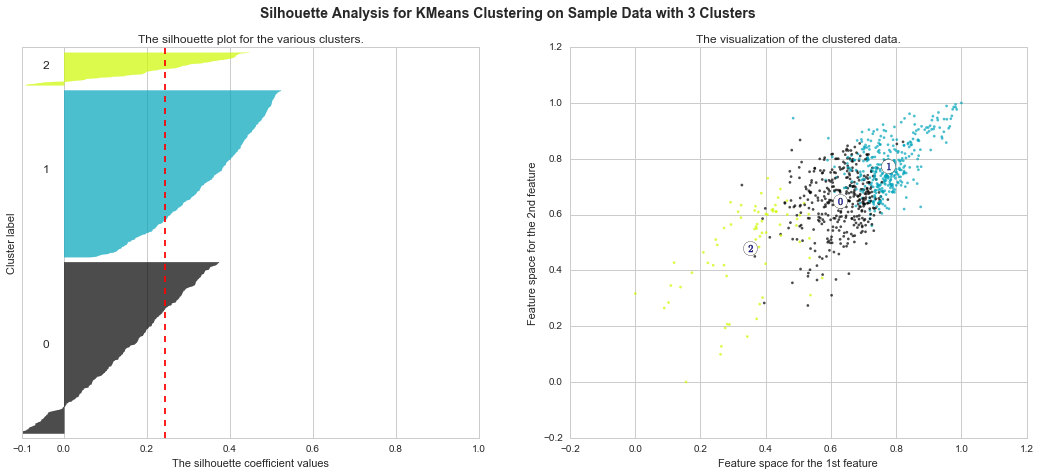

For n_clusters = 4 The average silhouette_score is : 0.249974046988


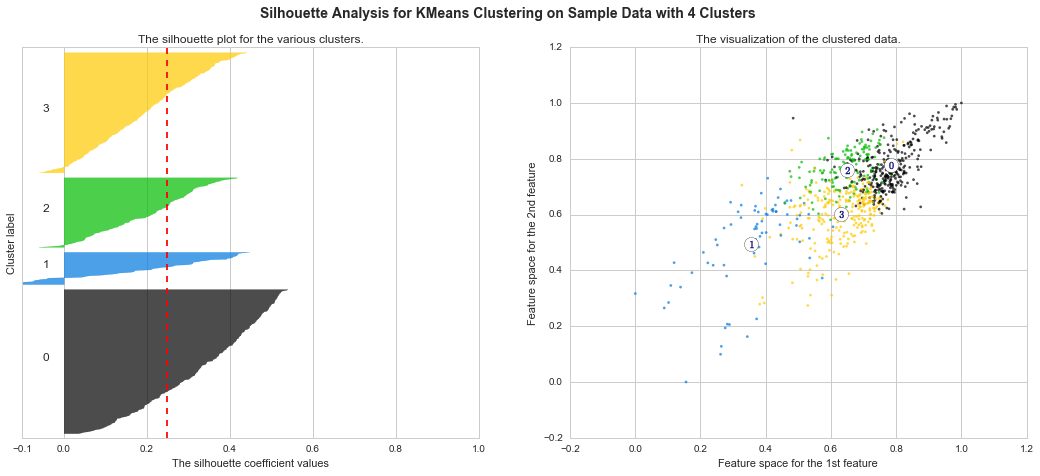

For n_clusters = 5 The average silhouette_score is : 0.221558582283


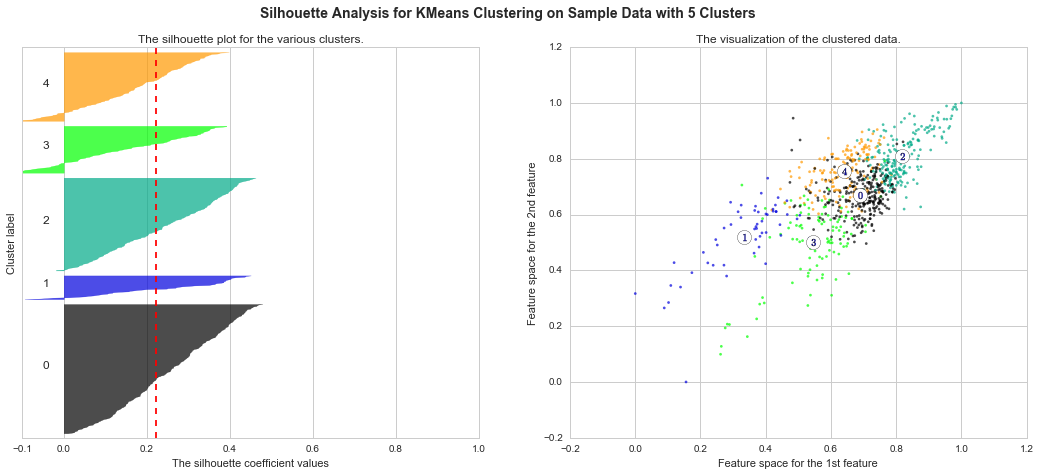

For n_clusters = 6 The average silhouette_score is : 0.223243682632


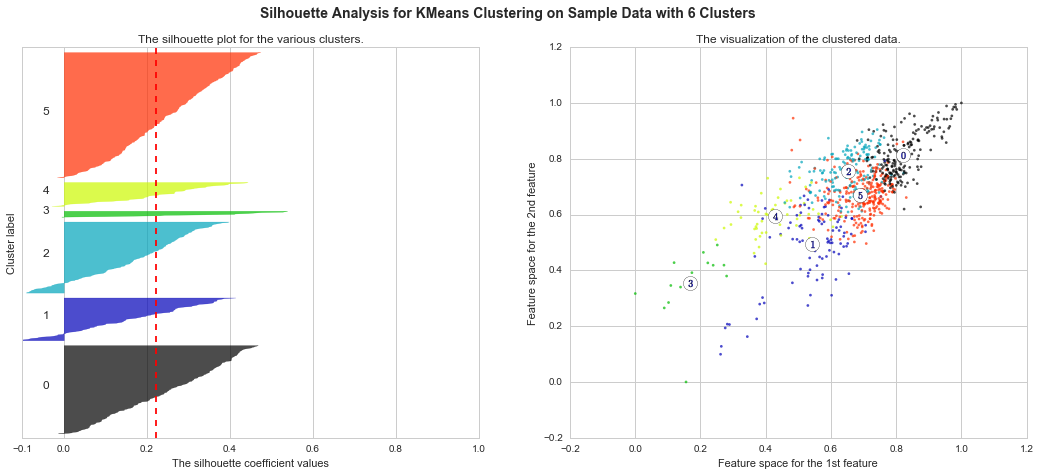

In [15]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
   
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.ix[:,0], X.ix[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette Analysis for KMeans Clustering on Sample Data "
                  "with %d Clusters" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [16]:
XStd = StandardScaler().fit_transform(X)
cov_mat = np.cov(XStd.T)
eigenValues, eigenVectors = np.linalg.eig(cov_mat)
eigenSum = sum(eigenValues)
expVar = [(i / eigenSum)*100 for i in sorted(eigenValues, reverse=True)]
cumExpVar = np.cumsum(expVar)
print (expVar, cumExpVar)

[62.437298129685473, 18.213960612214322, 6.5974296208480556, 5.9012647285786368, 3.1777664218930948, 1.6359681798097763, 1.301964453638397, 0.5699471555043305, 0.15340816245897815, 0.010992535368923591] [  62.43729813   80.65125874   87.24868836   93.14995309   96.32771951
   97.96368769   99.26565215   99.8355993    99.98900746  100.        ]


In [17]:
trace = Bar(
        x=["PC %s" %i for i in range(1,12)], 
        y=expVar,
        name = "Explained Variance"
        )

trace2 = Scatter(
        x=["PC %s" %i for i in range(1,12)], 
        y=cumExpVar,
        name= "Cumulative Explained Variance"
        )

data = Data([trace, trace2])

layout = Layout(
        yaxis = YAxis(title = "Explained Variance Ratio"),
        title = "Explained Variance for each Principal Component"
        )
        

fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [18]:
pca = PCA(n_components=3)
pcaDB = pd.DataFrame(pca.fit_transform(XStd), columns = ["PC1", "PC2", "PC3"])

In [19]:
pcaFeatureCorr = pd.DataFrame(pca.components_, columns=X.columns, index = [["PC1", "PC2", "PC3"]])
pcaFeatureCorr

,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
PC1,-0.372596,-0.290090,0.316118,0.310189,0.321842,0.384843,0.260909,0.234738,0.299917,0.340675
PC2,-0.067771,-0.458378,0.377767,-0.399627,-0.373590,0.088475,-0.238509,-0.407530,-0.070987,0.327845
PC3,0.135557,-0.085301,-0.201495,-0.022026,-0.004340,-0.147940,0.714996,-0.560309,0.291392,0.035826


In [20]:
x, y, z = pcaDB["PC1"], pcaDB["PC2"],  pcaDB["PC3"]

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')